In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV,KFold 
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error


import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv(r"I:\1 murali\great learning\Internship\Oasis\Advertising.csv")
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df = df.drop("Unnamed: 0",axis=1)
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
df.shape

(200, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

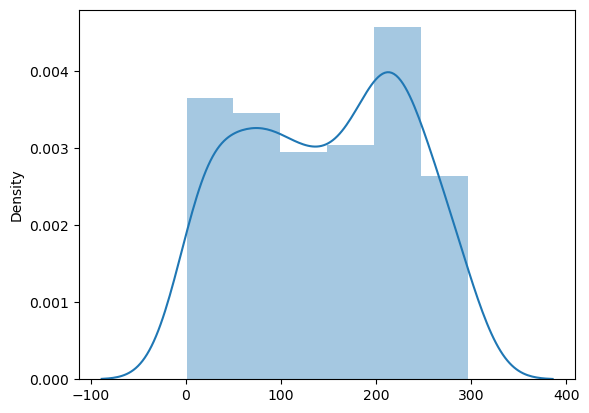

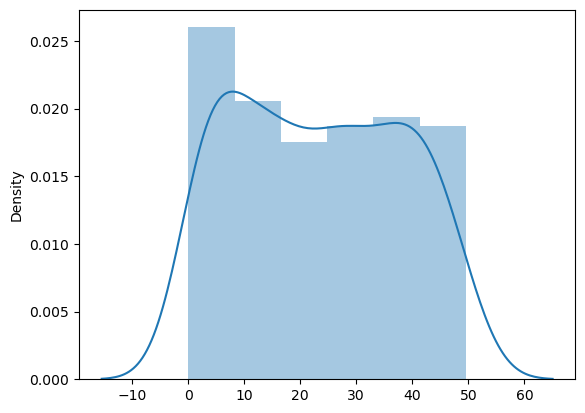

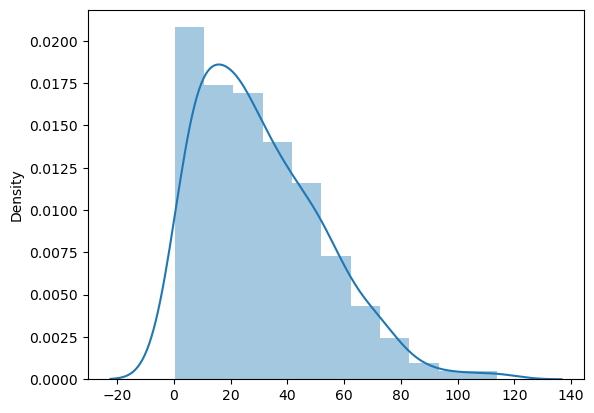

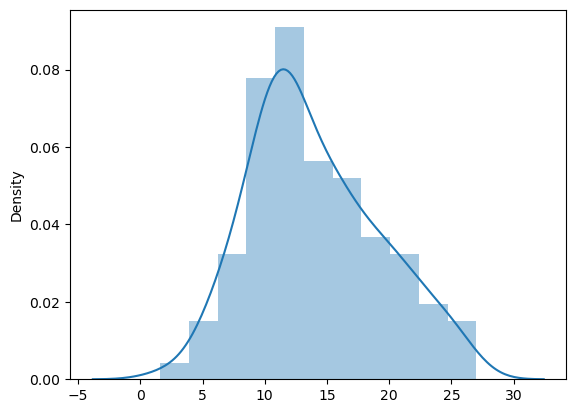

In [8]:
for i in df.columns:
    sns.distplot(x=df[i])
    plt.show()

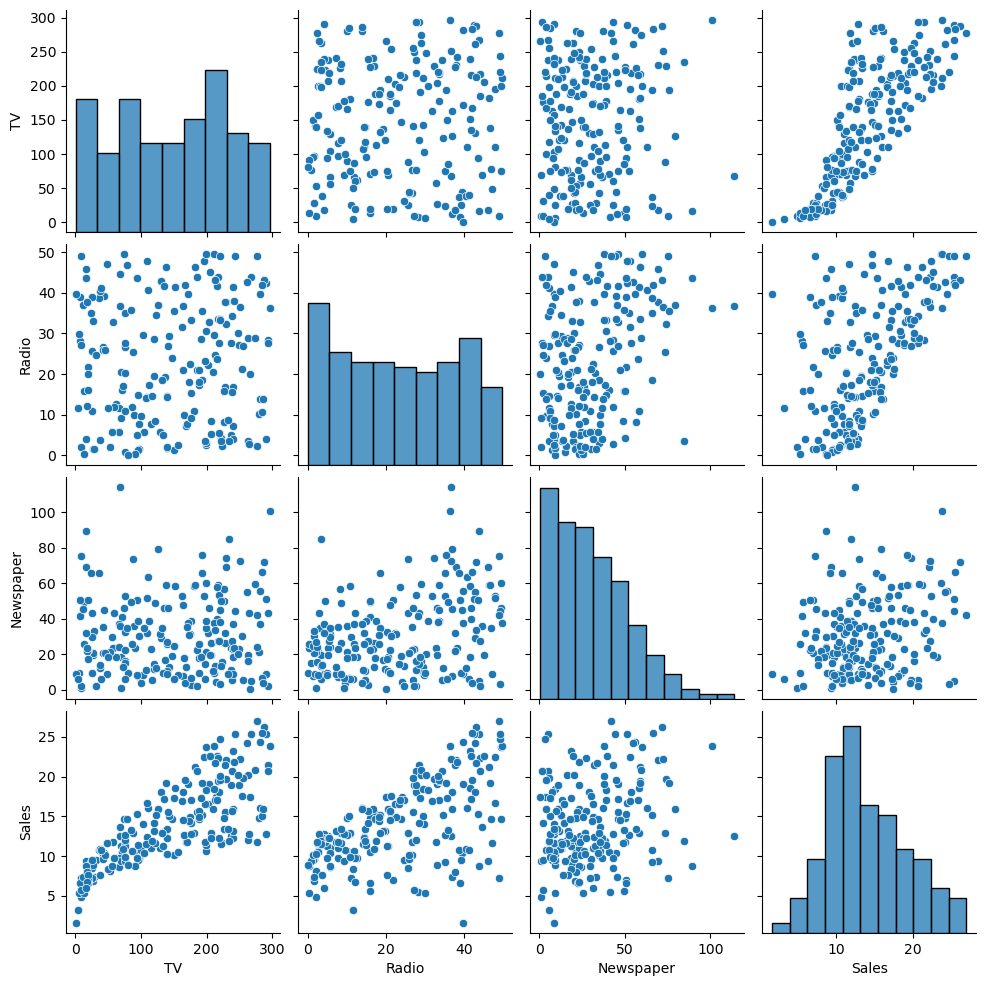

In [9]:
sns.pairplot(df)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

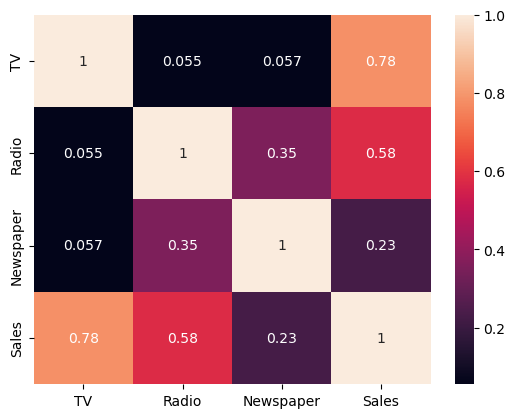

In [10]:
sns.heatmap(df.corr(),annot=True)
plt.show

In [11]:
x = df.drop("Sales",axis=1)
y = df["Sales"]

In [12]:
xtrain,xtest,ytrain,ytest= train_test_split(x,y,random_state=10,test_size=0.20)
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((160, 3), (40, 3), (160,), (40,))

In [13]:
col = pd.MultiIndex.from_product([["Train","Test"],["RMSE","MAPE"]])
model_score = pd.DataFrame(columns=col)
model_score.index.name = "Model Name"

In [14]:
def score_cal(model_df,model_name,model,x,y):
    xtrain,xtest,ytrain,ytest= train_test_split(x,y,random_state=10,test_size=0.20)
    xtrain,xtest,ytrain,ytest
    model.fit(xtrain,ytrain)
    ypred_train = model.predict(xtrain)
    ypred_test = model.predict(xtest)
    train_rmse = mean_squared_error(ytrain,ypred_train,squared=False)
    train_mape = mean_absolute_percentage_error(ytrain,ypred_train)
    test_rmse = mean_squared_error(ytest,ypred_test,squared=False)
    test_mape = mean_absolute_percentage_error(ytest,ypred_test)
    model_df.loc[model_name,:] = [train_rmse,train_mape,test_rmse,test_mape]
    return model_df

#### Linear Regression

In [15]:
lr = LinearRegression()
score_cal(model_score,"Linear Regression",lr,x,y)

Train              Test          
                       RMSE     MAPE     RMSE      MAPE
Model Name                                             
Linear Regression  1.363304  0.09929  2.58853  0.301554

#### Decision Tree

In [16]:
dt = DecisionTreeRegressor(random_state=10)
score_cal(model_score,"Decision Tree",dt,x,y)

Train               Test          
                       RMSE     MAPE      RMSE      MAPE
Model Name                                              
Linear Regression  1.363304  0.09929   2.58853  0.301554
Decision Tree           0.0      0.0  1.348518    0.1115

#### Decision Tree-Tuned

In [17]:
params = {"max_depth":range(21),"min_samples_split":range(10)}
dt = DecisionTreeRegressor(random_state=10)
gd = GridSearchCV(dt,params,cv=5)
gd.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=10),
             param_grid={'max_depth': range(0, 21),
                         'min_samples_split': range(0, 10)})

In [18]:
gd.best_params_

{'max_depth': 8, 'min_samples_split': 3}

In [19]:
dt = DecisionTreeRegressor(max_depth=12,min_samples_split=1,random_state=10)
score_cal(model_score,"Decision Tree-Tuned",dt,x,y)

Train               Test          
                         RMSE     MAPE      RMSE      MAPE
Model Name                                                
Linear Regression    1.363304  0.09929   2.58853  0.301554
Decision Tree             0.0      0.0  1.348518    0.1115
Decision Tree-Tuned       0.0      0.0  1.348518    0.1115

#### Random Forest

In [20]:
rf = RandomForestRegressor(random_state=10)
score_cal(model_score,"Random Forest",rf,x,y)

Train                Test          
                         RMSE      MAPE      RMSE      MAPE
Model Name                                                 
Linear Regression    1.363304   0.09929   2.58853  0.301554
Decision Tree             0.0       0.0  1.348518    0.1115
Decision Tree-Tuned       0.0       0.0  1.348518    0.1115
Random Forest        0.257316  0.016871  0.929246  0.102625

#### Random Forest-Tuned

In [21]:
params = {"max_depth":range(10),"min_samples_split":range(10)}
rf = RandomForestRegressor(random_state=10)
gd = GridSearchCV(rf,params,cv=5)
gd.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=10),
             param_grid={'max_depth': range(0, 10),
                         'min_samples_split': range(0, 10)})

In [22]:
gd.best_params_

{'max_depth': 9, 'min_samples_split': 1}

In [23]:
rf = RandomForestRegressor(max_depth=9,min_samples_split=1,random_state=10)
score_cal(model_score,"Random Forest-Tuned",rf,x,y)

Train                Test          
                         RMSE      MAPE      RMSE      MAPE
Model Name                                                 
Linear Regression    1.363304   0.09929   2.58853  0.301554
Decision Tree             0.0       0.0  1.348518    0.1115
Decision Tree-Tuned       0.0       0.0  1.348518    0.1115
Random Forest        0.257316  0.016871  0.929246  0.102625
Random Forest-Tuned  0.262768  0.017162  0.930675   0.10266

#### AdaBoost

In [24]:
adb = AdaBoostRegressor(random_state=10)
score_cal(model_score,"AdaBoost",adb,x,y)

Train                Test          
                         RMSE      MAPE      RMSE      MAPE
Model Name                                                 
Linear Regression    1.363304   0.09929   2.58853  0.301554
Decision Tree             0.0       0.0  1.348518    0.1115
Decision Tree-Tuned       0.0       0.0  1.348518    0.1115
Random Forest        0.257316  0.016871  0.929246  0.102625
Random Forest-Tuned  0.262768  0.017162  0.930675   0.10266
AdaBoost             0.725294   0.05241  1.115159  0.129338

#### Gradient Boosting

In [25]:
gdb = GradientBoostingRegressor(random_state=10)
score_cal(model_score,"Gradient Boosting",gdb,x,y)

Train                Test          
                         RMSE      MAPE      RMSE      MAPE
Model Name                                                 
Linear Regression    1.363304   0.09929   2.58853  0.301554
Decision Tree             0.0       0.0  1.348518    0.1115
Decision Tree-Tuned       0.0       0.0  1.348518    0.1115
Random Forest        0.257316  0.016871  0.929246  0.102625
Random Forest-Tuned  0.262768  0.017162  0.930675   0.10266
AdaBoost             0.725294   0.05241  1.115159  0.129338
Gradient Boosting    0.169306  0.010121  1.013702  0.116651

In [40]:
model_score.iloc[:,2]-model_score.iloc[:,0]

Model Name
Linear Regression      1.225226
Decision Tree          1.348518
Decision Tree-Tuned    1.348518
Random Forest           0.67193
Random Forest-Tuned    0.667907
AdaBoost               0.389865
Gradient Boosting      0.844396
dtype: object

In [39]:
model_score.iloc[:,3]-model_score.iloc[:,1]

Model Name
Linear Regression      0.202264
Decision Tree            0.1115
Decision Tree-Tuned      0.1115
Random Forest          0.085754
Random Forest-Tuned    0.085497
AdaBoost               0.076928
Gradient Boosting       0.10653
dtype: object

* From the above models AdaBoost gives the better resuslt. As we see minimum error in all three cases(train,test and overall). So we conclude with using AdaBoost for future predictions.